The notebook explains various scenarios of handling different type of variables 
- Numerical
- Categorical
- Date Type
- Mixed Type
- Missing Data values
- Handling outliers
- labels
- rare variables

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
use_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status','open_il_12m']
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\loan.csv', usecols=use_cols).sample(10000, random_state=44) 
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
70642,12000,10.33,115000.0,Current,10.0,2.0
490788,20000,11.99,19200.0,Current,9.0,0.0
2081591,35000,18.25,153619.0,Charged Off,27.0,NaN
900431,8000,7.99,67000.0,Fully Paid,10.0,1.0
781582,17000,9.16,50000.0,Fully Paid,9.0,0.0


In [6]:
data.loan_amnt.unique()
len(data.loan_amnt.unique())

849

Text(0, 0.5, 'Number of Loans')

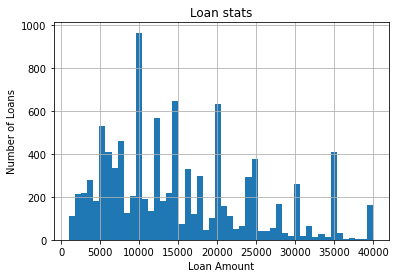

In [5]:
fig = data.loan_amnt.hist(bins=50)
fig.set_title('Loan stats')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

In [8]:
data.int_rate.unique()
len(data.int_rate.unique())

420

Text(0, 0.5, 'Number of Loans')

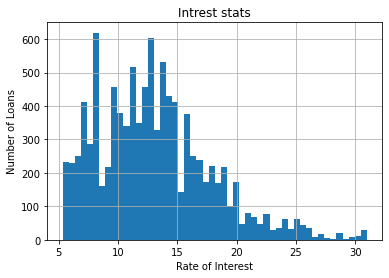

In [9]:
fig = data.int_rate.hist(bins=50)
fig.set_title('Intrest stats')
fig.set_xlabel('Rate of Interest')
fig.set_ylabel('Number of Loans')

Text(0, 0.5, 'Number of Customers')

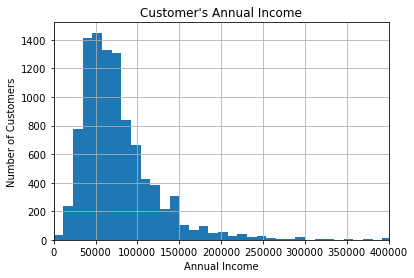

In [10]:
fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

In [11]:
data.open_acc.dropna().unique()

array([10.,  9., 27., 12.,  5., 19., 11., 14.,  8., 24., 15.,  7., 26.,
       22., 18., 21., 16., 17., 25., 23.,  4.,  6., 30.,  3., 31., 13.,
       28., 20., 29., 37.,  1., 35., 36., 44.,  2., 34., 39., 33., 32.,
       38., 40., 47., 46., 48., 43.,  0., 56., 42.])

In [12]:
data.shape

(10000, 6)

Text(0, 0.5, 'Customers')

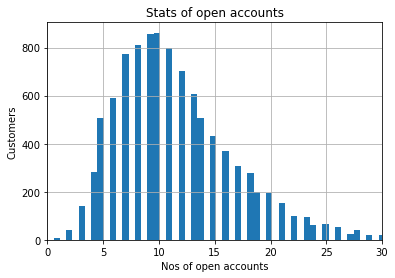

In [13]:
fig = data.open_acc.hist(bins=100)
fig.set_xlim(0,30)
fig.set_title("Stats of open accounts")
fig.set_xlabel("Nos of open accounts")
fig.set_ylabel("Customers")

In [14]:
data.open_il_12m.unique()

array([ 2.,  0., nan,  1.,  3.,  5.,  4.,  6.,  7.])

Text(0, 0.5, 'Number of Borrowers')

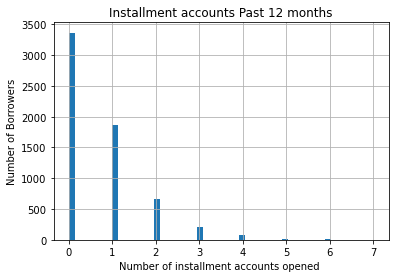

In [15]:
fig = data.open_il_12m.hist(bins=50)
fig.set_title('Installment accounts Past 12 months')
fig.set_xlabel('Number of installment accounts opened ')
fig.set_ylabel('Number of Borrowers')

In [17]:
data.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [19]:
data["defaulters"]=np.where(data.loan_status.isin(['Default']),1,0)

In [20]:
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulters
70642,12000,10.33,115000.0,Current,10.0,2.0,0
490788,20000,11.99,19200.0,Current,9.0,0.0,0
2081591,35000,18.25,153619.0,Charged Off,27.0,NaN,0
900431,8000,7.99,67000.0,Fully Paid,10.0,1.0,0
781582,17000,9.16,50000.0,Fully Paid,9.0,0.0,0


In [21]:
data.defaulters.mean()

0.0

In [22]:
data[data.loan_status.isin(['Default'])].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulters


Text(0, 0.5, 'Number of Loans')

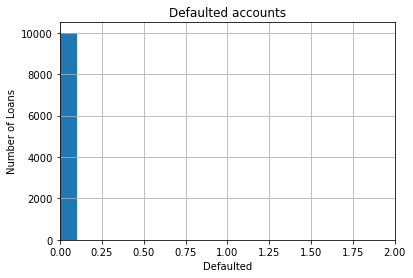

In [24]:
fig = data.defaulters.hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

In [26]:
use_cols = ['purpose', 'loan_status', 'home_ownership']
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\loan.csv',usecols=use_cols).sample(1000, random_state=44)
data.head()

,home_ownership,loan_status,purpose
70642,MORTGAGE,Current,other
490788,MORTGAGE,Current,debt_consolidation
2081591,MORTGAGE,Charged Off,debt_consolidation
900431,MORTGAGE,Fully Paid,home_improvement
781582,MORTGAGE,Fully Paid,debt_consolidation


In [27]:
data.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

Text(0, 0.5, 'Customers')

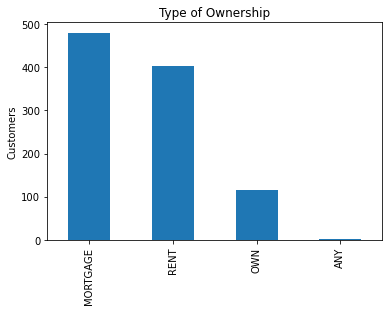

In [30]:
fig= data['home_ownership'].value_counts().plot.bar()
fig.set_title('Type of Ownership')
fig.set_ylabel('Customers')

In [31]:
data.home_ownership.value_counts()

MORTGAGE    480
RENT        404
OWN         115
ANY           1
Name: home_ownership, dtype: int64

In [32]:
data.purpose.unique()

array(['other', 'debt_consolidation', 'home_improvement', 'credit_card',
       'moving', 'medical', 'car', 'major_purchase', 'house',
       'small_business', 'vacation', 'renewable_energy'], dtype=object)

Text(0, 0.5, 'Customers')

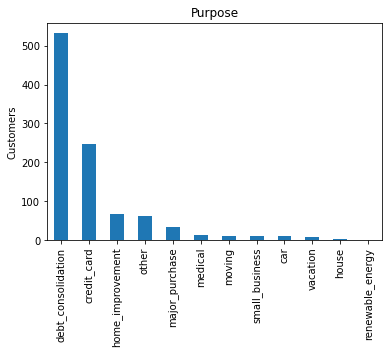

In [35]:
fig = data['purpose'].value_counts().plot.bar()
fig.set_title('Purpose')
fig.set_ylabel('Customers')

In [34]:
data.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period'],
      dtype=object)

Text(0, 0.5, 'Customers')

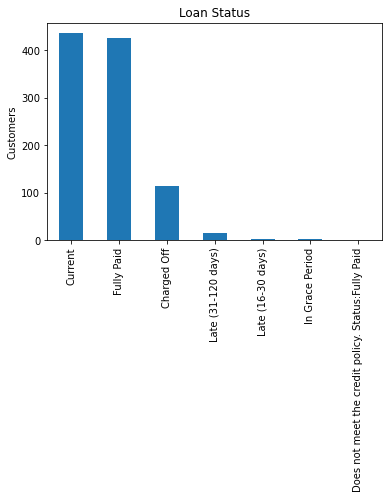

In [36]:
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Loan Status')
fig.set_ylabel('Customers')

In [39]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\loan.csv', usecols=use_cols).sample(1000)
data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
284632,20000,A,Jun-2018,home_improvement,Feb-2019
1756920,35000,E,Jul-2013,debt_consolidation,Mar-2014
1498308,6950,C,Aug-2017,debt_consolidation,Feb-2019
479856,20000,C,Jan-2018,debt_consolidation,Feb-2019
1733811,5700,C,Aug-2013,debt_consolidation,Nov-2013


In [40]:
data.shape

(1000, 5)

In [41]:
data.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

In [42]:
data['issue_date'] = pd.to_datetime(data.issue_d) #year-month-date
data['last_date'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d', 'issue_date', 'last_pymnt_d', 'last_date']].head()

,issue_d,issue_date,last_pymnt_d,last_date
284632,Jun-2018,2018-06-01,Feb-2019,2019-02-01
1756920,Jul-2013,2013-07-01,Mar-2014,2014-03-01
1498308,Aug-2017,2017-08-01,Feb-2019,2019-02-01
479856,Jan-2018,2018-01-01,Feb-2019,2019-02-01
1733811,Aug-2013,2013-08-01,Nov-2013,2013-11-01


In [44]:
data.groupby(['issue_date', 'grade'])['loan_amnt'].sum()

issue_date  grade
2008-07-01  C         7500
2009-10-01  C        15000
2010-03-01  A        10000
2010-04-01  A        10000
2010-06-01  A         8000
                     ...  
2018-12-01  A        76000
            B        53100
            C        49000
            D        57000
            E        23175
Name: loan_amnt, Length: 355, dtype: int64

Text(0, 0.5, 'Disbursed Amount (US Dollars)')

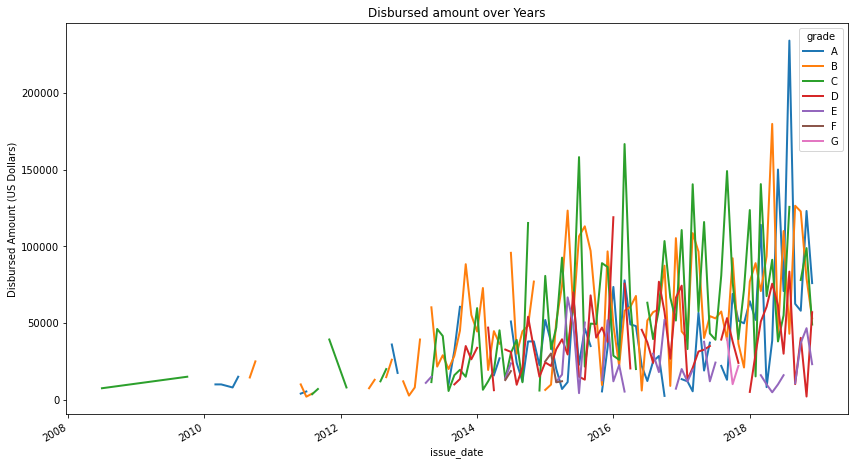

In [45]:
fig = data.groupby(['issue_date', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount over Years')
fig.set_ylabel('Disbursed Amount (US Dollars)')

In [46]:
use_cols = ['grade', 'purpose', 'open_il_24m']
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\loan.csv', usecols=use_cols).sample(1000)
data.head()


,grade,purpose,open_il_24m
830339,B,debt_consolidation,0.0
387870,E,debt_consolidation,8.0
1497600,C,credit_card,1.0
1783026,F,debt_consolidation,NaN
1589225,B,credit_card,0.0


In [47]:

data.open_il_24m.unique()

array([ 0.,  8.,  1., nan,  4.,  2., 10.,  3.,  5.,  7.,  6.])

Text(0, 0.5, 'Number of borrowers')

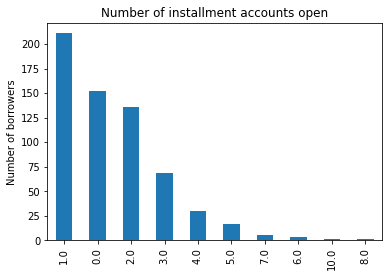

In [48]:
fig = data.open_il_24m.value_counts().plot.bar()
fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers')

# Missing Values

In [50]:
data = pd.read_csv("C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [54]:
data['cabin_null'] = np.where(data.Cabin.isnull(), 1, 0)  #only dead people cabin is unknown

In [56]:
data.cabin_null.mean()

0.7710437710437711

In [58]:
data.groupby(['Survived'])['cabin_null'].mean()  #group data by Survived vs Non-Survived

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [59]:
data['age_null'] = np.where(data.Age.isnull(), 1, 0)
data.groupby(['Survived'])['age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

 Conclusion: This is systematic loss of data
             "People who did not survive tend to have more missing information"

In [60]:
data[data.Embarked.isnull()]  #they survived but embarked info is missing (Missing Completely At Random Case)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


In [61]:
data=pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\loan.csv', usecols=['emp_title','emp_length'])
data.head()

,emp_title,emp_length
0,Chef,10+ years
1,Postmaster,10+ years
2,Administrative,6 years
3,IT Supervisor,10+ years
4,Mechanic,10+ years


In [62]:
data.isnull().mean()

emp_title     0.073858
emp_length    0.064984
dtype: float64

In [63]:
data.emp_title.unique()

array(['Chef', 'Postmaster ', 'Administrative', ...,
       'Sales, Estimating & Design', 'Acft mechanic', 'BABYSITTER'],
      dtype=object)

In [64]:
len(data.emp_title.unique())

512695

In [65]:
print("Types of Title : {}".format(len(data.emp_title.unique())))
data.emp_title.unique()[0:20]

Types of Title : 512695


array(['Chef', 'Postmaster ', 'Administrative', 'IT Supervisor',
       'Mechanic', 'Director COE', 'Account Manager',
       'Assistant Director', 'Legal Assistant III', nan, 'Consultant',
       'Job Coach Supervisor', 'Quality Field Engineer', 'Teller ',
       'respritory therapist', 'Worship Director', 'Processor ',
       'Neonatal Nurse Practitioner', 'Stationary Engineer',
       'Exhibits director'], dtype=object)

In [66]:
data.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [67]:
data.emp_length.value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [68]:
data.emp_length.value_counts() / len(data)

10+ years    0.330878
2 years      0.090096
< 1 year     0.084041
3 years      0.079956
1 year       0.065646
5 years      0.061795
4 years      0.060427
6 years      0.045397
7 years      0.041003
8 years      0.040658
9 years      0.035120
Name: emp_length, dtype: float64

In [80]:
length_dict = {k:'0-10 years' for k in data.emp_length.unique()}
length_dict['10+ years']='10+ years'
length_dict['n/a']='n/a'


In [81]:
length_dict

{'10+ years': '10+ years',
 '6 years': '0-10 years',
 '4 years': '0-10 years',
 '< 1 year': '0-10 years',
 '2 years': '0-10 years',
 '9 years': '0-10 years',
 nan: '0-10 years',
 '5 years': '0-10 years',
 '3 years': '0-10 years',
 '7 years': '0-10 years',
 '1 year': '0-10 years',
 '8 years': '0-10 years',
 'n/a': 'n/a'}

In [78]:
data['emp_length_redefined'] = data.emp_length.map(length_dict)
data.emp_length_redefined.unique()

array(['10+ years', '0-10 years'], dtype=object)

In [79]:
data['emp_length_redefined']

0           10+ years
1           10+ years
2          0-10 years
3           10+ years
4           10+ years
              ...    
2260663     10+ years
2260664    0-10 years
2260665     10+ years
2260666    0-10 years
2260667    0-10 years
Name: emp_length_redefined, Length: 2260668, dtype: object

In [77]:
value = len(data[data.emp_title.isnull()])
data[data.emp_title.isnull()].groupby(['emp_length_redefined'])['emp_length'].count().sort_values() / value

emp_length_redefined
10+ years     0.021124
0-10 years    0.103810
Name: emp_length, dtype: float64

In [82]:
value = len(data.dropna(subset=['emp_title']))
data.dropna(subset=['emp_title']).groupby(['emp_length_redefined'])['emp_length'].count().sort_values() / value

emp_length_redefined
10+ years     0.355580
0-10 years    0.644039
Name: emp_length, dtype: float64

##### Conclusion: 'n/a' in 'employment length' could be supplied by people who are retired, or students, or self-employed.Therefore the customer would enter 'n/a' and leave empty the form at the side of 'employer_name'.This indicates there exsist relationship between missing values

# Handling outliers

'''Finding Outlier due to mechanical error:

Extreme Value Analysis method is to determine the statistical tails of the underlying 
distribution of the variable, and then finding the values that sit at the very end of the tails.
The distribution of the variable is Gaussian and thus 
outliers will lie outside the mean +/- 3 times the standard deviation of the variable.

If the variable is not normally distributed,calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)
'''

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [85]:
data = pd.read_csv("C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


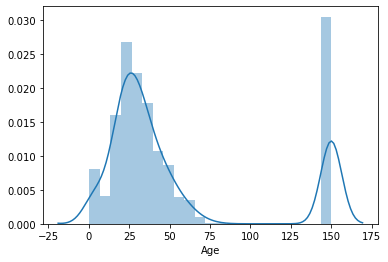

In [89]:
sns.distplot(data.Age.fillna(150))

Text(0, 0.5, 'Passengers')

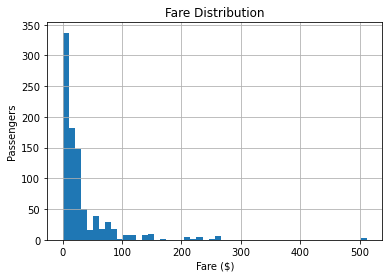

In [90]:

fig = data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare ($)')
fig.set_ylabel('Passengers')

The distribution is skewed and not normal

Text(0, 0.5, 'Fare')

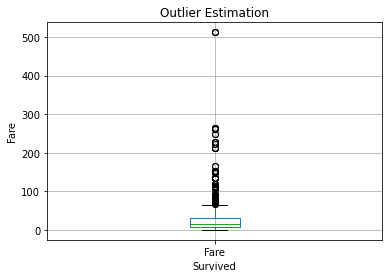

In [91]:
fig = data.boxplot(column='Fare')
fig.set_title('Outlier Estimation')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

In [93]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [94]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(65.6344, -26.724, 23.0896)

In [95]:
#extreme case analysis
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR          #Fare cant be negative

(100.2688, -61.358399999999996, 23.0896)

In [96]:
print('total passengers: {}'.format(data.shape[0]))

total passengers: 891


In [97]:
print('Nos passengers that paid more than 65: {}'.format(data[data.Fare > 65].shape[0]))
print('Nos passengers that paid more than 100: {}'.format(data[data.Fare > 100].shape[0]))
print('Nos passengers that paid more than 200: {}'.format(data[data.Fare > 200].shape[0]))
print('Nos passengers that paid more than 300: {}'.format(data[data.Fare > 300].shape[0]))

Nos passengers that paid more than 65: 116
Nos passengers that paid more than 100: 53
Nos passengers that paid more than 200: 20
Nos passengers that paid more than 300: 3


In [100]:
#percentile calculation
total = data.shape[0]
print('Percentile : paid more than 65 : {}'.format(data[data.Fare > 65].shape[0]/total))
print('Percentile : paid more than 100: {}'.format(data[data.Fare > 100].shape[0]/total))
print('Percentile : paid more than 200: {}'.format(data[data.Fare > 200].shape[0]/total))
print('Percentile : paid more than 300: {}'.format(data[data.Fare > 300].shape[0]/total))

Percentile : paid more than 65 : 0.13019079685746351
Percentile : paid more than 100: 0.05948372615039282
Percentile : paid more than 200: 0.02244668911335578
Percentile : paid more than 300: 0.003367003367003367


In [103]:
high_fare_df = data[data.Fare>100]    
#high_fare_df.count()
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

In [104]:
multiple_tickets = pd.concat(
    [   high_fare_df.groupby('Ticket')['Fare'].count(),
        high_fare_df.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
113503,1,211.5000
113760,4,120.0000
113781,4,151.5500
16966,2,134.5000
17421,4,110.8833
19950,4,263.0000
24160,3,211.3375
35273,3,113.2750
36928,2,164.8667


# Conclusion:
People who bought their tickets together, they were a family so have the same ticket number.
And the fare attached to them is no longer the individual Fare, rather the group Fare. 
So, fare should be divided by the number of tickets bought together to find out the individual price.

In [105]:
data[data.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Text(0, 0.5, 'Number of Passengers')

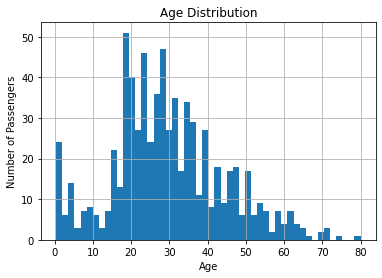

In [106]:
fig = data.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Age')

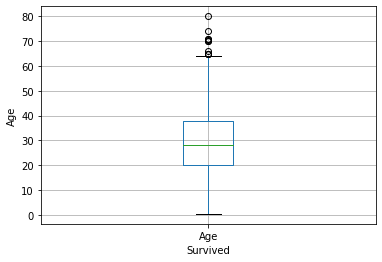

In [107]:
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

In [108]:
#Age follows a Gaussian distribution
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [109]:
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()

Upper_boundary, Lower_boundary

(73.27860964406095, -13.88037434994331)

In [110]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Age.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(64.8125, -6.6875, 17.875)

In [111]:
#extreme cases
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(91.625, -33.5, 17.875)

In [112]:
data = data.dropna(subset=['Age'])
total= np.float(data.shape[0])

print('passengers older than 73 (Gaussian approach): {}'.format(data[data.Age > 73].shape[0] / total))
print('passengers older than 65 (IQR): {}'.format(data[data.Age > 65].shape[0] / total))
print('passengers older than 91 (IQR, extreme): {}'.format(data[data.Age >= 91].shape[0] / total))

passengers older than 73 (Gaussian approach): 0.0028011204481792717
passengers older than 65 (IQR): 0.011204481792717087
passengers older than 91 (IQR, extreme): 0.0


In [113]:
data[data.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


# Effect of Outliers

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [115]:
data = pd.read_csv("C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
#check for null values
data[['Age', 'Fare']].isnull().mean()

Age     0.198653
Fare    0.000000
dtype: float64

In [117]:
#fill null with 0
X_train, X_test, Y_train, Y_test=train_test_split(data[['Age', 'Fare']].fillna(0),data.Survived,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [118]:
# create a new dataset
data_clean = data.copy()

# replace outliers in Age using the boundary from the Gaussian assumption method(capping or top-coding)
data_clean.loc[data_clean.Age >= 73, 'Age'] = 73

# replace outliers in Fare using the boundary of the interquantile range method
data_clean.loc[data_clean.Fare > 100, 'Fare'] = 100

# Let's divide into train and test sets
X_train_clean, X_test_clean, Y_train_clean, Y_test_clean=train_test_split(data_clean[['Age', 'Fare']].fillna(0),
                                                                          data_clean.Survived,
                                                                          test_size=0.3,
                                                                          random_state=0)

### Logistic Regression Check

In [124]:
#With Outliers
lreg = LogisticRegression(random_state=12,solver='lbfgs')
lreg.fit(X_train, Y_train)
pred = lreg.predict_proba(X_test)
print("With Outliers")
print('Logistic Regression Accuracy: {}'.format(lreg.score(X_test, Y_test)))
print('Logistic Regression ROC-AUC: {}'.format(roc_auc_score(Y_test, pred[:, 1])))


#Without Outliers
lreg_no = LogisticRegression(random_state=44,solver='lbfgs')
lreg_no.fit(X_train_clean, Y_train_clean)
pred = lreg_no.predict_proba(X_test_clean)
print("Without Outliers")
print('Logistic Regression Accuracy: {}'.format(lreg_no.score(X_test_clean, Y_test_clean)))
print('Logistic Regression ROC-AUC: {}'.format(roc_auc_score(Y_test_clean, pred[:, 1])))

With Outliers
Logistic Regression Accuracy: 0.6940298507462687
Logistic Regression ROC-AUC: 0.71375
Without Outliers
Logistic Regression Accuracy: 0.7052238805970149
Logistic Regression ROC-AUC: 0.7149404761904762


Conclusion: Outlier Impact is less

# Adaboost Check

In [127]:
#With Outliers
abc = AdaBoostClassifier(n_estimators=100, random_state=12)
abc.fit(X_train, Y_train)
pred = abc.predict_proba(X_test)
print("With Outliers")
print('AdaBoost Accuracy: {}'.format(abc.score(X_test, Y_test)))
print('AdaBoost ROC-AUC: {}'.format(roc_auc_score(Y_test, pred[:, 1])))

#Without Outliers
abc= AdaBoostClassifier(n_estimators=100, random_state=12)
abc.fit(X_train_clean, Y_train_clean)
pred = abc.predict_proba(X_test_clean)
print("Without Outliers")
print('AdaBoost Accuracy: {}'.format(abc.score(X_test_clean, Y_test_clean)))
print('AdaBoost ROC-AUC: {}'.format(roc_auc_score(Y_test_clean, pred[:,1])))

With Outliers
AdaBoost Accuracy: 0.7425373134328358
AdaBoost ROC-AUC: 0.7461011904761905
Without Outliers
AdaBoost Accuracy: 0.7238805970149254
AdaBoost ROC-AUC: 0.7604464285714286


Conclusion: Outlier Impact is clearly seen on ROC_AUC


# Random Forest Check

In [128]:
#With Outliers
rfc = RandomForestClassifier(n_estimators=100, random_state=12)
rfc.fit(X_train, Y_train)
pred = rfc.predict_proba(X_test)
print("With Outliers")
print('Random Forest Classifier Accuracy: {}'.format(rfc.score(X_test, Y_test)))
print('Random Forest Classifier ROC-AUC: {}'.format(roc_auc_score(Y_test, pred[:, 1])))

#Without Outliers
rfc= RandomForestClassifier(n_estimators=100, random_state=12)
rfc.fit(X_train_clean, Y_train_clean)
pred = rfc.predict_proba(X_test_clean)
print("Without Outliers")
print('Random Forest Classifier  Accuracy: {}'.format(rfc.score(X_test_clean, Y_test_clean)))
print('Random Forest Classifier ROC-AUC: {}'.format(roc_auc_score(Y_test_clean, pred[:,1])))

With Outliers
Random Forest Classifier Accuracy: 0.7238805970149254
Random Forest Classifier ROC-AUC: 0.7336904761904762
Without Outliers
Random Forest Classifier  Accuracy: 0.7126865671641791
Random Forest Classifier ROC-AUC: 0.7277976190476191


Conclusion: Random forest is hardly impacted by Outlier

# Label Handling

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [175]:
data = pd.read_csv("C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
print('#Categories within Name: {}'.format(len(data.Name.unique())))
print('#Categories within Sex: {}'.format(len(data.Sex.unique())))
print('#Categories within Ticket: {}'.format(len(data.Ticket.unique())))
print('#Categories within Cabin: {}'.format(len(data.Cabin.unique())))
print('#Categories within Embarked: {}'.format(len(data.Embarked.unique())))
print("Total Passenger: {}".format(len(data)))

#Categories within Name: 891
#Categories within Sex: 2
#Categories within Ticket: 681
#Categories within Cabin: 148
#Categories within Embarked: 4
Total Passenger: 891


In [177]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [178]:
data['Cabin_indicator'] = data['Cabin'].astype(str).str[0]

data[['Cabin', 'Cabin_indicator']].head(10)

,Cabin,Cabin_indicator
0,NaN,n
1,C85,C
2,NaN,n
3,C123,C
4,NaN,n
5,NaN,n
6,E46,E
7,NaN,n
8,NaN,n
9,NaN,n


In [179]:
print('#Categories within Cabin: {}'.format(len(data.Cabin.unique())))
print('#Reduced Categories within Cabin : {}'.format(len(data.Cabin_indicator.unique())))

#Categories within Cabin: 148
#Reduced Categories within Cabin : 9


In [180]:
use_cols = ['Cabin', 'Cabin_indicator', 'Sex']
X_train, X_test, Y_train, Y_test = train_test_split(data[use_cols],data.Survived,test_size=0.3,random_state=12)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [181]:
X_train

,Cabin,Cabin_indicator,Sex
832,NaN,n,male
391,NaN,n,male
497,NaN,n,male
398,NaN,n,male
70,NaN,n,male
...,...,...,...
241,NaN,n,female
253,NaN,n,male
390,B96 B98,B,male
667,NaN,n,male


In [182]:
unique_to_train_set = [x for x in X_train.Cabin.unique() if x not in X_test.Cabin.unique()]
unique_to_train_set

[nan,
 'C92',
 'E46',
 'F38',
 'B38',
 'D49',
 'E25',
 'C85',
 'A34',
 'B42',
 'E67',
 'E63',
 'D21',
 'C30',
 'B96 B98',
 'D36',
 'B50',
 'B41',
 'B79',
 'F4',
 'D',
 'C82',
 'B86',
 'E40',
 'B77',
 'C91',
 'C125',
 'C90',
 'D33',
 'C65',
 'F33',
 'D56',
 'E31',
 'A32',
 'A24',
 'A20',
 'C50',
 'C83',
 'A10',
 'C22 C26',
 'F E69',
 'C62 C64',
 'C45',
 'E33',
 'B5',
 'D6',
 'C52',
 'E10',
 'B102',
 'D45',
 'B73',
 'C78',
 'B78',
 'A14',
 'C118',
 'B22',
 'C70',
 'A36',
 'C86',
 'A31',
 'A7',
 'C46',
 'A19',
 'D48',
 'C7',
 'C95',
 'D50',
 'A5',
 'B4',
 'B101',
 'B3',
 'B30',
 'D9',
 'C111',
 'E49',
 'C101',
 'D28',
 'E36',
 'E77',
 'F G63',
 'B39',
 'C110',
 'E68',
 'D19',
 'C99',
 'A23']

In [160]:

len(unique_to_train_set)

86

In [183]:
unique_to_test_set = [x for x in X_test.Cabin.unique() if x not in X_train.Cabin.unique()]
len(unique_to_test_set)

40

In [184]:
unique_to_test_set = [x for x in X_test.Cabin_indicator.unique() if x not in X_train.Cabin_indicator.unique()]
len(unique_to_test_set)

1

In [185]:
unique_to_train_set = [x for x in X_train.Cabin_indicator.unique() if x not in X_test.Cabin_indicator.unique()]
unique_to_train_set

[]

In [186]:
cabin_dict = {k:i for i,k in enumerate(X_train.Cabin.unique(), 0)} 
cabin_dict

{nan: 0,
 'C92': 1,
 'B51 B53 B55': 2,
 'G6': 3,
 'E46': 4,
 'F38': 5,
 'B38': 6,
 'D49': 7,
 'E25': 8,
 'C85': 9,
 'A34': 10,
 'B42': 11,
 'E67': 12,
 'B57 B59 B63 B66': 13,
 'C123': 14,
 'C68': 15,
 'E63': 16,
 'D21': 17,
 'C30': 18,
 'B96 B98': 19,
 'D36': 20,
 'B50': 21,
 'E101': 22,
 'B41': 23,
 'B79': 24,
 'F4': 25,
 'D': 26,
 'B20': 27,
 'C82': 28,
 'B86': 29,
 'E40': 30,
 'B77': 31,
 'C91': 32,
 'C125': 33,
 'C90': 34,
 'D33': 35,
 'C65': 36,
 'F33': 37,
 'B58 B60': 38,
 'D56': 39,
 'E31': 40,
 'C2': 41,
 'A32': 42,
 'A24': 43,
 'A20': 44,
 'C50': 45,
 'C83': 46,
 'A10': 47,
 'C22 C26': 48,
 'F E69': 49,
 'C62 C64': 50,
 'D26': 51,
 'C45': 52,
 'E33': 53,
 'E24': 54,
 'B5': 55,
 'D6': 56,
 'C52': 57,
 'E10': 58,
 'B102': 59,
 'D17': 60,
 'C124': 61,
 'D45': 62,
 'B73': 63,
 'C78': 64,
 'B78': 65,
 'A14': 66,
 'B18': 67,
 'C118': 68,
 'B22': 69,
 'C70': 70,
 'A36': 71,
 'C86': 72,
 'A31': 73,
 'A7': 74,
 'B35': 75,
 'C46': 76,
 'A19': 77,
 'D48': 78,
 'C7': 79,
 'C95': 80,
 'D50

In [187]:
len(cabin_dict)

109

In [188]:
X_train.loc[:, 'Cabin_mapped'] = X_train.loc[:, 'Cabin'].map(cabin_dict)
X_test.loc[:, 'Cabin_mapped'] = X_test.loc[:, 'Cabin'].map(cabin_dict)

X_train[['Cabin_mapped', 'Cabin']].head(10)

,Cabin_mapped,Cabin
832,0,NaN
391,0,NaN
497,0,NaN
398,0,NaN
70,0,NaN
849,1,C92
220,0,NaN
679,2,B51 B53 B55
9,0,NaN
827,0,NaN


In [189]:
X_train

,Cabin,Cabin_indicator,Sex,Cabin_mapped
832,NaN,n,male,0
391,NaN,n,male,0
497,NaN,n,male,0
398,NaN,n,male,0
70,NaN,n,male,0
...,...,...,...,...
241,NaN,n,female,0
253,NaN,n,male,0
390,B96 B98,B,male,19
667,NaN,n,male,0


In [190]:
#cabin_dict = {k:i for i,k in enumerate(X_train.Cabin.unique(), 0)} 
#X_train.loc[:, 'Cabin_mapped'] = X_train.loc[:, 'Cabin'].map(cabin_dict)
#X_test.loc[:, 'Cabin_mapped'] = X_test.loc[:, 'Cabin'].map(cabin_dict)
#X_train[['Cabin_mapped', 'Cabin']].head(10)

cabin_dict = {k: i for i, k in enumerate(X_train['Cabin_indicator'].unique(), 0)}
X_train.loc[:, 'Cabin_indicator'] = X_train.loc[:, 'Cabin_indicator'].map(cabin_dict)
X_test.loc[:, 'Cabin_indicator'] = X_test.loc[:, 'Cabin_indicator'].map(cabin_dict)

X_train[['Cabin_indicator', 'Cabin']].head(10)

,Cabin_indicator,Cabin
832,0,NaN
391,0,NaN
497,0,NaN
398,0,NaN
70,0,NaN
849,1,C92
220,0,NaN
679,2,B51 B53 B55
9,0,NaN
827,0,NaN


In [191]:
X_train.loc[:, 'Sex'] = X_train.loc[:, 'Sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'Sex'] = X_test.loc[:, 'Sex'].map({'male': 0, 'female': 1})
X_train.Sex.head()

832    0
391    0
497    0
398    0
70     0
Name: Sex, dtype: int64

In [192]:
X_train

,Cabin,Cabin_indicator,Sex,Cabin_mapped
832,NaN,0,0,0
391,NaN,0,0,0
497,NaN,0,0,0
398,NaN,0,0,0
70,NaN,0,0,0
...,...,...,...,...
241,NaN,0,1,0
253,NaN,0,0,0
390,B96 B98,2,0,19
667,NaN,0,0,0


In [194]:
X_train[['Cabin_mapped','Cabin_indicator', 'Sex']].isnull().sum()

Cabin_mapped       0
Cabin_indicator    0
Sex                0
dtype: int64

In [196]:
X_test[['Cabin_mapped','Cabin_indicator', 'Sex']].isnull().sum()

Cabin_mapped       45
Cabin_indicator     1
Sex                 0
dtype: int64

In [197]:
len(X_train.Cabin_mapped.unique()), len(X_train.Cabin_indicator.unique())

(109, 8)

# Random Forest

In [201]:
#High cardinality
rfc = RandomForestClassifier(n_estimators=100, random_state=12)
rfc.fit(X_train[['Cabin_mapped', 'Sex']], Y_train)
pred_train = rfc.predict_proba(X_train[['Cabin_mapped', 'Sex']])
pred_test = rfc.predict_proba(X_test[['Cabin_mapped', 'Sex']].fillna(0))
print("High cardinality")
print('Training Accuracy Random Forests ROC-AUC: {}'.format(roc_auc_score(Y_train, pred_train[:,1])))
print('Test Accuracy Random Forests ROC-AUC: {}'.format(roc_auc_score(Y_test, pred_test[:,1])))

#Low cardinality
rfci = RandomForestClassifier(n_estimators=100, random_state=12)
rfci.fit(X_train[['Cabin_indicator', 'Sex']], Y_train)
pred_train = rfci.predict_proba(X_train[['Cabin_indicator', 'Sex']])
pred_test = rfci.predict_proba(X_test[['Cabin_indicator', 'Sex']].fillna(0))
print("Low cardinality")
print('Training Accuracy Random Forests ROC-AUC: {}'.format(roc_auc_score(Y_train, pred_train[:,1])))
print('Test Accuracy Random Forests ROC-AUC: {}'.format(roc_auc_score(Y_test, pred_test[:,1])))

High cardinality
Training Accuracy Random Forests ROC-AUC: 0.8619598596183373
Test Accuracy Random Forests ROC-AUC: 0.7615371219597143
Low cardinality
Training Accuracy Random Forests ROC-AUC: 0.8314268479929809
Test Accuracy Random Forests ROC-AUC: 0.8058861090149184


Conclusion: Impact of cardinality affect RandomForestClassifier performance

# Ada Boost Classifier

In [203]:
#High cardinality
abc = AdaBoostClassifier(n_estimators=100, random_state=12)
abc.fit(X_train[['Cabin_mapped', 'Sex']], Y_train)
pred_train = abc.predict_proba(X_train[['Cabin_mapped', 'Sex']])
pred_test = abc.predict_proba(X_test[['Cabin_mapped', 'Sex']].fillna(0))
print("High cardinality")
print('Training Accuracy Ada Boost ROC-AUC: {}'.format(roc_auc_score(Y_train, pred_train[:,1])))
print('Test Accuracy Ada Boost ROC-AUC: {}'.format(roc_auc_score(Y_test, pred_test[:,1])))

#Low cardinality
abci = AdaBoostClassifier(n_estimators=100, random_state=12)
abci.fit(X_train[['Cabin_indicator', 'Sex']], Y_train)
pred_train = abci.predict_proba(X_train[['Cabin_indicator', 'Sex']])
pred_test = abci.predict_proba(X_test[['Cabin_indicator', 'Sex']].fillna(0))
print("Low cardinality")
print('Training Accuracy Ada Boost ROC-AUC: {}'.format(roc_auc_score(Y_train, pred_train[:,1])))
print('Test Accuracy Ada Boost ROC-AUC: {}'.format(roc_auc_score(Y_test, pred_test[:,1])))


High cardinality
Training Accuracy Ada Boost ROC-AUC: 0.8458817723184909
Test Accuracy Ada Boost ROC-AUC: 0.7512335287629883
Low cardinality
Training Accuracy Ada Boost ROC-AUC: 0.8310320245667909
Test Accuracy Ada Boost ROC-AUC: 0.8044348987055203


Conclusion: Model with high cardinality overfits whereas low cardinality model achieves better accuracy

# Gradient Boosting Classifier

In [205]:
#High cardinality
gb = GradientBoostingClassifier(n_estimators=100, random_state=12)
gb.fit(X_train[['Cabin_mapped', 'Sex']], Y_train)
pred_train = gb.predict_proba(X_train[['Cabin_mapped', 'Sex']])
pred_test = gb.predict_proba(X_test[['Cabin_mapped', 'Sex']].fillna(0))
print("High cardinality")
print('Training Accuracy Gradient Boosted Trees ROC-AUC: {}'.format(roc_auc_score(Y_train, pred_train[:,1])))
print('Test Accuracy Gradient Boosted Trees ROC-AUC: {}'.format(roc_auc_score(Y_test, pred_test[:,1])))

#Low cardinality
gbi = GradientBoostingClassifier(n_estimators=100, random_state=12)
gbi.fit(X_train[['Cabin_indicator', 'Sex']], Y_train)
pred_train = gbi.predict_proba(X_train[['Cabin_indicator', 'Sex']])
pred_test = gbi.predict_proba(X_test[['Cabin_indicator', 'Sex']].fillna(0))
print("Low cardinality")
print('Training Accuracy Gradient Boosted Trees  ROC-AUC: {}'.format(roc_auc_score(Y_train, pred_train[:,1])))
print('Test Accuracy Gradient Boosted Trees ROC-AUC: {}'.format(roc_auc_score(Y_test, pred_test[:,1])))


High cardinality
Training Accuracy Gradient Boosted Trees ROC-AUC: 0.8584941873217811
Test Accuracy Gradient Boosted Trees ROC-AUC: 0.7688512219190805
Low cardinality
Training Accuracy Gradient Boosted Trees  ROC-AUC: 0.8314268479929809
Test Accuracy Gradient Boosted Trees ROC-AUC: 0.806176351076798


Conclusion: Model with high cardinality overfits whereas low cardinality model achieves better accuracy

# Handling Rare Variables

- Infrequent labels adds noise,therefore causing over-fitting.
- Rare labels present in training set, but not in test set,causing over-fitting to the train set.
- Rare labels in the test set, and not in the train set make model blind and will not know how to evaluate it.


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [210]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\mercedess\\train.csv', usecols=['y','X1', 'X2', 'X3', 'X6'])
data.head()

,y,X1,X2,X3,X6
0,130.81,v,at,a,j
1,88.53,t,av,e,l
2,76.26,w,n,c,j
3,80.62,t,n,f,l
4,78.02,v,n,f,d


In [212]:
usecols = ['X1', 'X2', 'X3', 'X6']
for col in usecols:
    print('Car Type: ', col, 'Num of Models: ', len(data[col].unique()))
print('TOTAL CARS: ', len(data))

Car Type:  X1 Num of Models:  27
Car Type:  X2 Num of Models:  44
Car Type:  X3 Num of Models:  7
Car Type:  X6 Num of Models:  12
TOTAL CARS:  4209


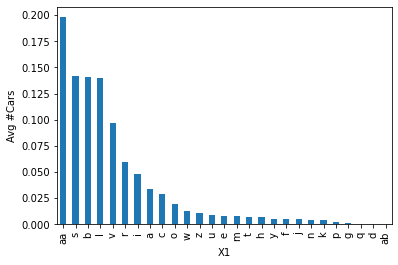

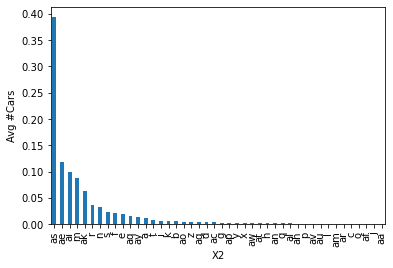

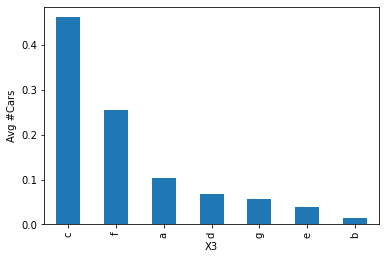

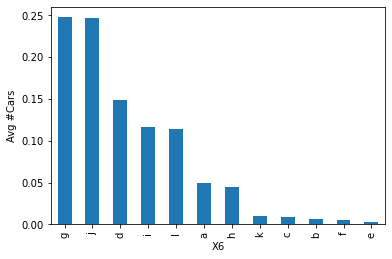

In [214]:
total_cars = len(data)
for col in usecols:
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('Avg #Cars')
    plt.show()

In [219]:
temp_df = pd.Series(data['X3'].value_counts() / total_cars).reset_index()
temp_df

,index,X3
0,c,0.461392
1,f,0.255643
2,a,0.104538
3,d,0.068900
4,g,0.057258
5,e,0.038727
6,b,0.013542


In [220]:
temp_df.columns = ['X3', 'X3_perc_cars']
temp_df

,X3,X3_perc_cars
0,c,0.461392
1,f,0.255643
2,a,0.104538
3,d,0.068900
4,g,0.057258
5,e,0.038727
6,b,0.013542


In [216]:
data.columns

Index(['y', 'X1', 'X2', 'X3', 'X6'], dtype='object')

In [221]:

data.groupby(['X3'])['y'].mean().reset_index()

,X3,y
0,a,102.507477
1,b,100.239649
2,c,101.959269
3,d,105.114414
4,e,100.033190
5,f,96.564507
6,g,100.428672


In [222]:
temp_df = temp_df.merge(data.groupby(['X3'])['y'].mean().reset_index(), on='X3', how='left')
temp_df

,X3,X3_perc_cars,y
0,c,0.461392,101.959269
1,f,0.255643,96.564507
2,a,0.104538,102.507477
3,d,0.068900,105.114414
4,g,0.057258,100.428672
5,e,0.038727,100.033190
6,b,0.013542,100.239649


Text(0, 0.5, 'Seconds')

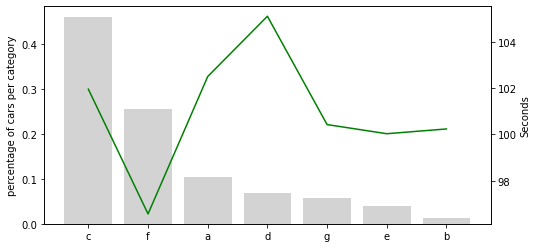

In [223]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(temp_df.index, temp_df['X3'], rotation=0)

ax2 = ax.twinx()
ax.bar(temp_df.index, temp_df["X3_perc_cars"], color='lightgrey')
ax2.plot(temp_df.index, temp_df["y"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

- f pass the test relatively quickly
- d take a longer time

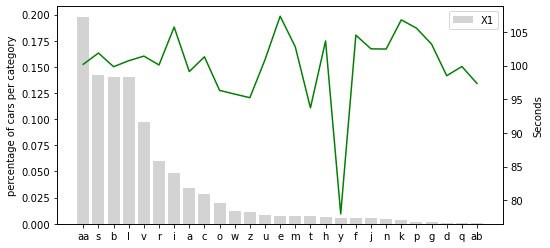

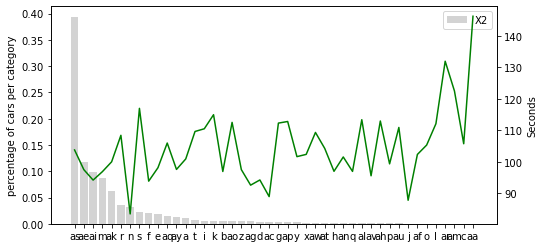

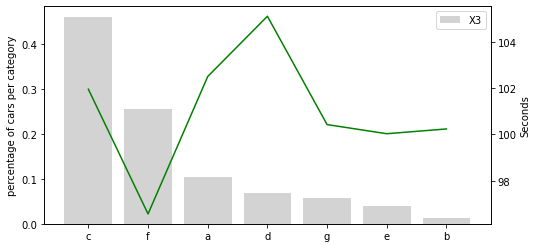

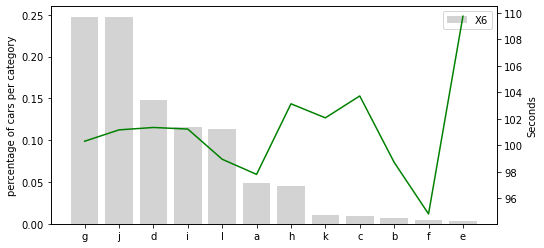

In [226]:
for col in usecols:
    temp_df = pd.Series(data[col].value_counts() / total_cars).reset_index()
    temp_df.columns = [col, col + '_perc_cars']
    temp_df = temp_df.merge(data.groupby([col])['y'].mean().reset_index(), on=col, how='left')

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()
    ax.bar(temp_df.index,temp_df[col + '_perc_cars'],color='lightgrey',label=col)
    ax2.plot(temp_df.index,temp_df["y"],color='green')
    ax.set_ylabel('percentage of cars per category')
    ax2.set_ylabel('Seconds')
    ax.legend()
    plt.show()

In [227]:
# grouping rare labels into one category
temp_df = pd.Series(data['X1'].value_counts() / total_cars)
temp_df.sort_values(ascending=False)
temp_df

aa    0.197909
s     0.142077
b     0.140651
l     0.140176
v     0.096935
r     0.059634
i     0.048230
a     0.033975
c     0.028748
o     0.019482
w     0.012354
z     0.010929
u     0.008791
e     0.007840
m     0.007603
t     0.007365
h     0.006890
y     0.005464
f     0.005464
j     0.005227
n     0.004514
k     0.004039
p     0.002138
g     0.001426
d     0.000713
q     0.000713
ab    0.000713
Name: X1, dtype: float64

In [228]:
temp_df[temp_df >= 0.1].index

Index(['aa', 's', 'b', 'l'], dtype='object')

In [229]:
grouping_dict = {k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)for k in temp_df.index}
grouping_dict

{'aa': 'aa',
 's': 's',
 'b': 'b',
 'l': 'l',
 'v': 'rare',
 'r': 'rare',
 'i': 'rare',
 'a': 'rare',
 'c': 'rare',
 'o': 'rare',
 'w': 'rare',
 'z': 'rare',
 'u': 'rare',
 'e': 'rare',
 'm': 'rare',
 't': 'rare',
 'h': 'rare',
 'y': 'rare',
 'f': 'rare',
 'j': 'rare',
 'n': 'rare',
 'k': 'rare',
 'p': 'rare',
 'g': 'rare',
 'd': 'rare',
 'q': 'rare',
 'ab': 'rare'}

In [230]:
data['X1_grouped'] = data['X1'].map(grouping_dict)
data[['X1', 'X1_grouped']].head(10)

,X1,X1_grouped
0,v,rare
1,t,rare
2,w,rare
3,t,rare
4,v,rare
5,b,b
6,r,rare
7,l,l
8,s,s
9,b,b


In [231]:
for col in usecols[1:]:
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    grouping_dict = {k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)for k in temp_df.index}
    data[col + '_grouped'] = data[col].map(grouping_dict)

data.head()

,y,X1,X2,X3,X6,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,130.81,v,at,a,j,rare,rare,a,j
1,88.53,t,av,e,l,rare,rare,rare,l
2,76.26,w,n,c,j,rare,rare,c,j
3,80.62,t,n,f,l,rare,rare,f,l
4,78.02,v,n,f,d,rare,rare,f,d


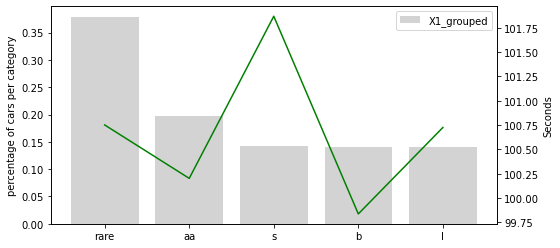

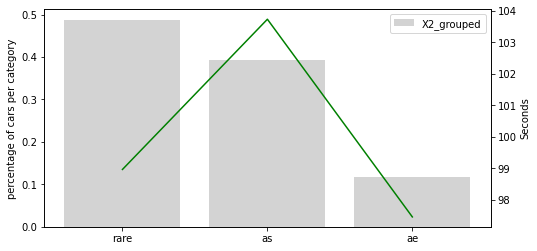

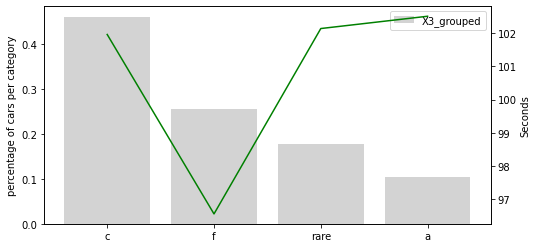

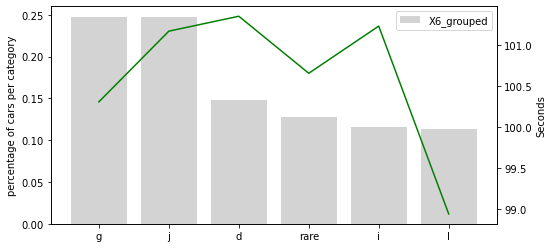

In [232]:
for col in ['X1_grouped', 'X2_grouped', 'X3_grouped', 'X6_grouped']:
    temp_df = pd.Series(data[col].value_counts() / total_cars).reset_index()
    temp_df.columns = [col, col + '_perc_cars']
    temp_df = temp_df.merge(data.groupby([col])['y'].mean().reset_index(), on=col, how='left')

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(temp_df.index, temp_df[col], rotation=0)
    ax2 = ax.twinx()
    ax.bar(temp_df.index,temp_df[col + '_perc_cars'],color='lightgrey',label=col)
    ax2.plot(temp_df.index,temp_df["y"],color='green')
    ax.set_ylabel('percentage of cars per category')
    ax2.set_ylabel('Seconds')
    ax.legend()
    plt.show()

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(data[usecols], data.y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((2946, 4), (1263, 4))

In [234]:
unique_to_train_set = [x for x in X_train['X2'].unique() if x not in X_test['X2'].unique()]
print(unique_to_train_set)

['l', 'aa', 'au', 'o', 'af', 'c', 'am']


In [235]:
unique_to_test_set = [x for x in X_test['X2'].unique() if x not in X_train['X2'].unique()]
print(unique_to_test_set)

['ar', 'j']


In [236]:
# original variables
for col in usecols:
    data.loc[:, col] = data.loc[:, col].map({k: i for i, k in enumerate(data[col].unique(), 0)})

# variables with grouped categories
for col in ['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']:
    data.loc[:, col] = data.loc[:, col].map({k: i for i, k in enumerate(data[col].unique(), 0)})

data.head(10)

,y,X1,X2,X3,X6,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,130.81,0,0,0,0,0,0,0,0
1,88.53,1,1,1,1,0,0,1,1
2,76.26,2,2,2,0,0,0,2,0
3,80.62,1,2,3,1,0,0,3,1
4,78.02,0,2,3,2,0,0,3,2
5,92.93,3,3,2,3,1,0,2,3
6,128.76,4,3,3,3,0,0,3,3
7,91.91,5,4,3,0,2,1,3,0
8,108.67,6,4,1,4,3,1,1,4
9,126.99,3,5,2,5,1,0,2,3


In [237]:
usecols

['X1', 'X2', 'X3', 'X6']

In [238]:
cols_grouped = ['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']
cols_grouped

['X1_grouped', 'X6_grouped', 'X3_grouped', 'X2_grouped']

In [240]:
cols = usecols+cols_grouped

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(data[cols],data.y,test_size=0.3,random_state=12)
X_train.shape, X_test.shape

((2946, 8), (1263, 8))

In [243]:
usecols

['X1', 'X2', 'X3', 'X6']

# Random Forest

In [250]:
#with Rare columns
rfr = RandomForestRegressor(n_estimators=100, random_state=12)
rfr.fit(X_train[usecols],Y_train)

print("Including rare column")
print("Training stats")
pred_train = rfr.predict(X_train[usecols])
print('Random Forests MSE: {}'.format(mean_squared_error(Y_train, pred_train)))
print('Random Forests R2-Score: {}'.format(r2_score(Y_train, pred_train)))
print("Testing stats")
pred_test = rfr.predict(X_test[usecols])
print('Random Forests MSE: {}'.format(mean_squared_error(Y_test, pred_test)))
print('Random Forests R2-Score: {}'.format(r2_score(Y_test, pred_test)))
print()
#Without Rare columns
rfri = RandomForestRegressor(n_estimators=100, random_state=12)
rfri.fit(X_train[cols_grouped], Y_train)
print("Excluding rare column")
print("Training stats")
pred_train = rfri.predict(X_train[cols_grouped])
print('Random Forests MSE: {}'.format(mean_squared_error(Y_train, pred_train)))
print('Random Forests R2-Score: {}'.format(r2_score(Y_train, pred_train)))
pred_test = rfri.predict(X_test[cols_grouped])
print("Testing stats")
print('Random Forests MSE: {}'.format(mean_squared_error(Y_test, pred_test)))
print('Random Forests R2-Score: {}'.format(r2_score(Y_test, pred_test)))



Including rare column
Training stats
Random Forests MSE: 74.96465263665708
Random Forests R2-Score: 0.5191864416623145
Testing stats
Random Forests MSE: 146.75968663540525
Random Forests R2-Score: 0.14638237600505988

Excluding rare column
Training stats
Random Forests MSE: 120.82256037174851
Random Forests R2-Score: 0.22505976968399655
Testing stats
Random Forests MSE: 159.29972343942154
Random Forests R2-Score: 0.07344411436890352


# AdaBoost

In [253]:
ada = AdaBoostRegressor(n_estimators=100, random_state=12)
ada.fit(X_train[usecols], Y_train)
print("Including rare column")
print("Training stats")
pred = ada.predict(X_train[usecols])
print('AdaBoost mse: {}'.format(mean_squared_error(Y_train, pred)))
print('AdaBoost r2: {}'.format(r2_score(Y_train, pred)))
print("Testing stats")
pred = ada.predict(X_test[usecols])
print('AdaBoost mse: {}'.format(mean_squared_error(Y_test, pred)))
print('AdaBoost r2: {}'.format(r2_score(Y_test, pred)))

print()
ada = AdaBoostRegressor(n_estimators=100, random_state=12)
ada.fit(X_train[cols_grouped], Y_train)
print("Excluding rare column")
print("Training stats")
pred = ada.predict(X_train[cols_grouped])
print('AdaBoost mse: {}'.format(mean_squared_error(Y_train, pred)))
print('AdaBoost r2: {}'.format(r2_score(Y_train, pred)))
print("Testing stats")
pred = ada.predict(X_test[cols_grouped])
print('AdaBoost mse: {}'.format(mean_squared_error(Y_test, pred)))
print('AdaBoost r2: {}'.format(r2_score(Y_test, pred)))

Including rare column
Training stats
AdaBoost mse: 160.3295049319383
AdaBoost r2: -0.028332648274675964
Testing stats
AdaBoost mse: 182.7806251341423
AdaBoost r2: -0.06313093545183412

Excluding rare column
Training stats
AdaBoost mse: 152.472442892501
AdaBoost r2: 0.022061528505841754
Testing stats
AdaBoost mse: 173.66133718754097
AdaBoost r2: -0.010089224284636877


# Linear Regression

In [255]:
linreg = LinearRegression()
linreg.fit(X_train[usecols], Y_train)
print("Including rare column")
print("Training stats")
pred = linreg.predict(X_train[usecols])
print('Linear Regression mse: {}'.format(mean_squared_error(Y_train, pred)))
print('Linear Regression r2: {}'.format(r2_score(Y_train, pred)))
print("Testing stats")
pred = linreg.predict(X_test[usecols])
print('Linear Regression mse: {}'.format(mean_squared_error(Y_test, pred)))
print('Linear Regression r2e: {}'.format(r2_score(Y_test, pred)))

print()
linreg = LinearRegression()
linreg.fit(X_train[cols_grouped], Y_train)
print("Excluding rare column")
print("Training stats")
pred = linreg.predict(X_train[cols_grouped])
print('Linear Regression mse: {}'.format(mean_squared_error(Y_train, pred)))
print('Linear Regression r2: {}'.format(r2_score(Y_train, pred)))
print("Testing stats")
pred = linreg.predict(X_test[cols_grouped])
print('Linear Regression mse: {}'.format(mean_squared_error(Y_test, pred)))
print('Linear Regression r2e: {}'.format(r2_score(Y_test, pred)))

Including rare column
Training stats
Linear Regression mse: 155.2419346076012
Linear Regression r2: 0.004298367876282239
Testing stats
Linear Regression mse: 171.3193887962327
Linear Regression r2e: 0.003532557467144648

Excluding rare column
Training stats
Linear Regression mse: 151.85397584273787
Linear Regression r2: 0.026028295941589286
Testing stats
Linear Regression mse: 168.05258069090112
Linear Regression r2e: 0.022533722138804557
